In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [3]:
df['opposition']= df['opposition'].apply(lambda x : x[2:])

In [4]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df['year'] = df['date'].dt.year.astype(int)

In [5]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)

In [6]:
df.drop(columns = 'odi_number',inplace = True)

In [7]:
df_new = df.loc[((df['score']!='DNB') & (df['score']!='TDNB')),'runs_scored':]
df_new

runs_scored balls_faced strike_rate fours sixes   opposition  \
0             0           1           0     0     0   Bangladesh   
1            12          11      109.09     2     0   Bangladesh   
2             7           2         350     0     1   Bangladesh   
3             3           7       42.85     0     0     Pakistan   
4           148         123      120.32    15     4     Pakistan   
..          ...         ...         ...   ...   ...          ...   
344          28          52       53.84     3     0  Afghanistan   
345          56          61        91.8     3     2  West Indies   
346          42          31      135.48     4     1      England   
347          35          33      106.06     4     0   Bangladesh   
349          50          72       69.44     1     1  New Zealand   

            ground       date  year  not_out  
0       Chattogram 2004-12-23  2004        0  
1            Dhaka 2004-12-26  2004        0  
2            Dhaka 2004-12-27  2004        1  
3            Kochi 2005-04-02  2005        0  
4    Visakhapatnam 2005-04-05  2005        0  
..             ...        ...   ...      ...  
344    Southampton 2019-06-22  2019        0  
345     Manchester 2019-06-27  2019        1  
346     Birmingham 2019-06-30  2019        1  
347     Birmingham 2019-07-02  2019        0  
349     Manchester 2019-07-09  2019        0  

[297 rows x 10 columns]

In [8]:
df_new ['runs_scored'] = df_new ['runs_scored'].astype(int)
df_new ['balls_faced'] = df_new ['balls_faced'].astype(int)
df_new ['strike_rate'] = df_new ['strike_rate'].astype(float)
df_new ['fours'] = df_new ['fours'].astype(int)
df_new ['sixes'] = df_new ['sixes'].astype(int)

In [9]:
first_match_date = df['date'].dt.date.min().strftime('%B %d %Y')
print('first_match_date - ',first_match_date)
last_match_date = df['date'].dt.date.max().strftime('%B %d %Y')
print('last_match_date - ',last_match_date)
number_of_matches = df.shape[0]
print('number_of_matches - ',number_of_matches)
number_of_inns = df_new.shape[0]
print('number_of_inns - ',number_of_inns)
not_outs = df_new['not_out'].sum()
print('not_outs - ',not_outs)
runs_scored = df_new['runs_scored'].sum()
print('runs_scored - ',runs_scored)
balls_faced = df_new['balls_faced'].sum()
print('balls_faced - ',balls_faced)
career_sr = 100*runs_scored/balls_faced
print('career_sr - {:.2f}',format(career_sr))
career_avg =runs_scored/(number_of_inns-not_outs)
print('career_avg - {:.2f}',format(career_avg))
highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(),'date'].values[0]
print('highest_score_date - ',highest_score_date)
highest_score = df.loc[df.date == highest_score_date,'score'].values[0]
print('highest_score - ',highest_score)
hundreds = df_new.loc[df_new['runs_scored']>=100].shape[0]
print('hundreds - ',hundreds)
fifties = df_new.loc[df_new['runs_scored']>=50].shape[0]
print('fifties - ',fifties)
fours = df_new['fours'].sum()
print('fours - ',fours)
sixes = df_new['sixes'].sum()
print('sixes - ',sixes)

first_match_date -  December 23 2004
last_match_date -  July 09 2019
number_of_matches -  350
number_of_inns -  297
not_outs -  84
runs_scored -  10773
balls_faced -  12303
career_sr - {:.2f} 87.56400877834675
career_avg - {:.2f} 50.57746478873239
highest_score_date -  2005-10-31T00:00:00.000000000
highest_score -  183*
hundreds -  10
fifties -  83
fours -  826
sixes -  229


opposition_counts -  opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


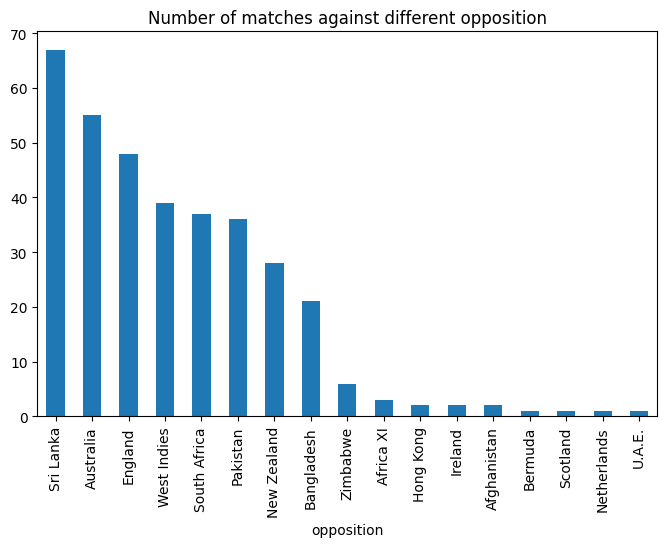

In [10]:
opposition_counts = df['opposition'].value_counts()
print('opposition_counts - ',opposition_counts)
opposition_counts.plot(kind = 'bar' , title = 'Number of matches against different opposition',figsize=(8,5))
plt.show()

sum_of_runs_scored opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


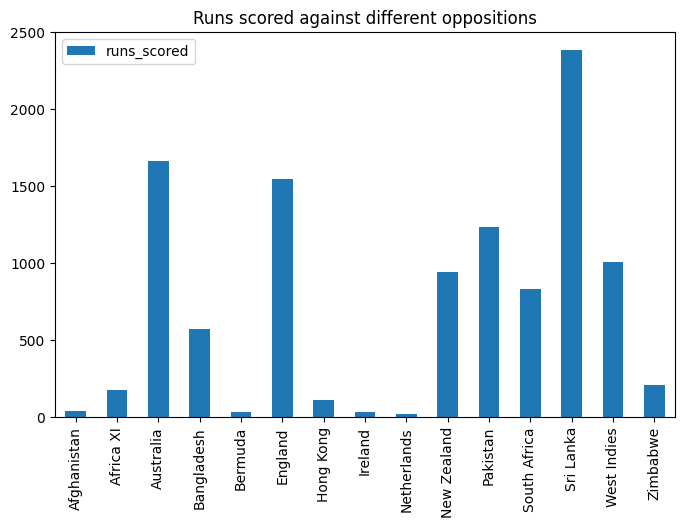

In [11]:
grouped_by_opposition = df_new.groupby('opposition')
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print('sum_of_runs_scored',sum_of_runs_scored)
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition',kind='bar',title ='Runs scored against different oppositions',figsize=(8,5))
plt.xlabel(None);
plt.show()

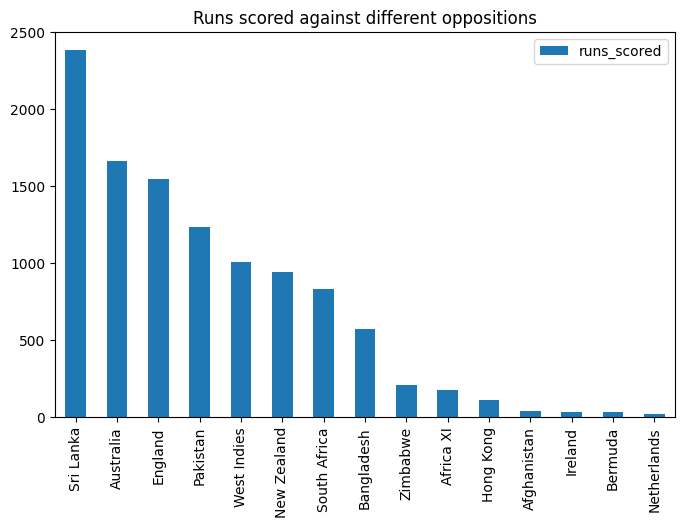

In [12]:
sorted = runs_scored_by_opposition.sort_values(by = 'runs_scored',ascending = False)
sorted.plot(x='opposition',kind='bar',title ='Runs scored against different oppositions',figsize=(8,5))
plt.xlabel(None);
plt.show()

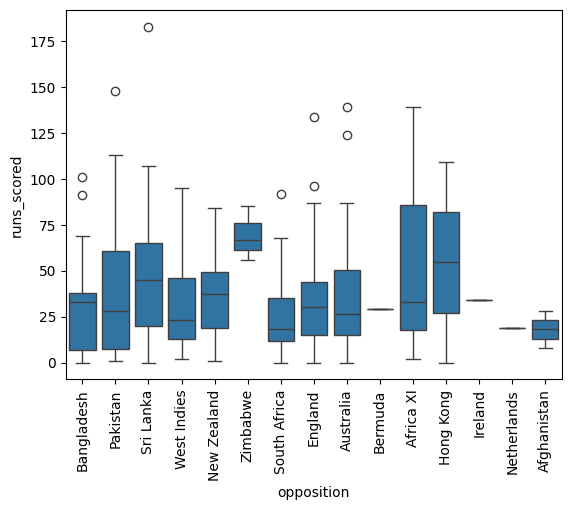

In [13]:
sns.boxplot(x ='opposition',y = 'runs_scored',data = df_new)
plt.xticks(rotation = 90)
plt.show()

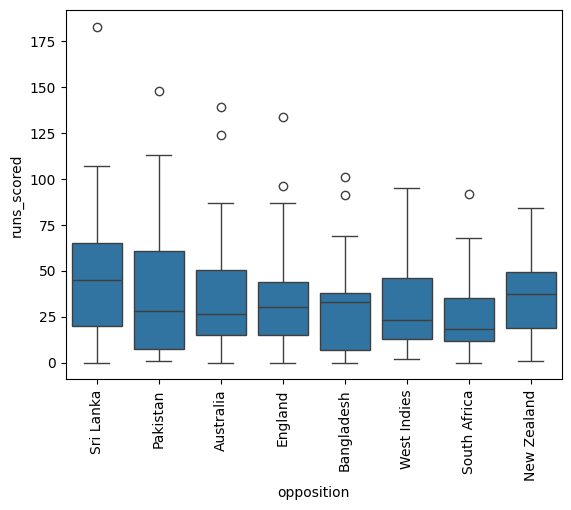

In [14]:
opposition_list = ['England','Australia','West Indies','South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
df_filtered = df_filtered.sort_values(by = 'runs_scored',ascending =False)
sns.boxplot(x='opposition',y='runs_scored',data = df_filtered)
plt.xticks(rotation = 90)
plt.show()

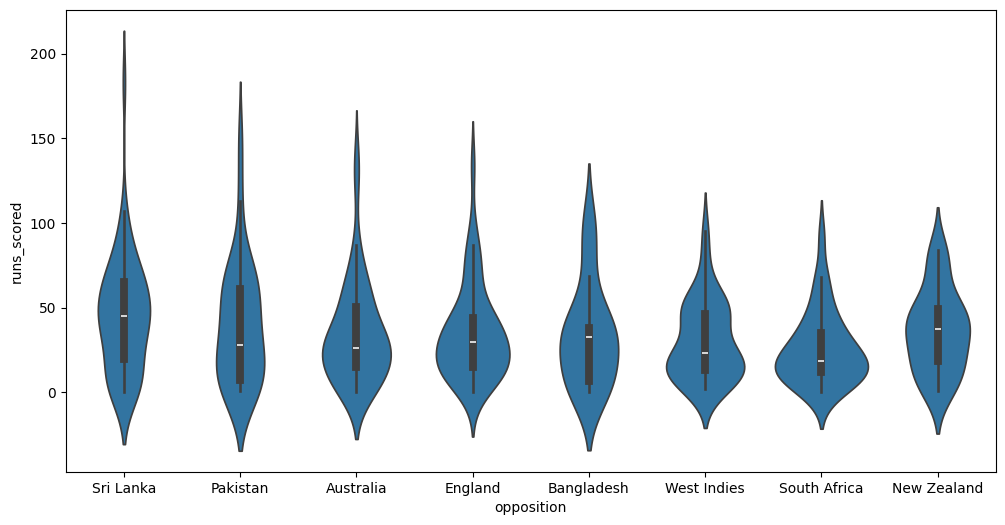

In [15]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'opposition',y='runs_scored',data = df_filtered)
plt.show()

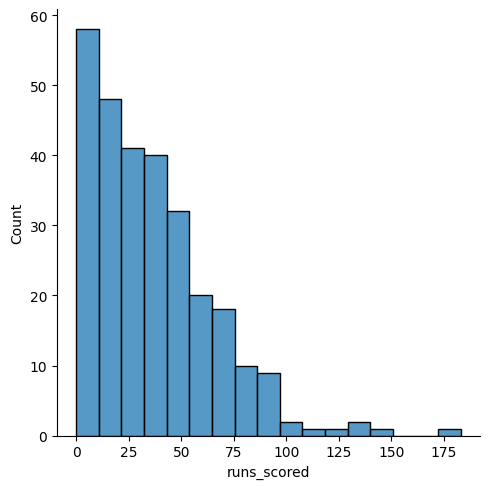

In [16]:
sns.displot(data=df_filtered,x='runs_scored')
plt.show()

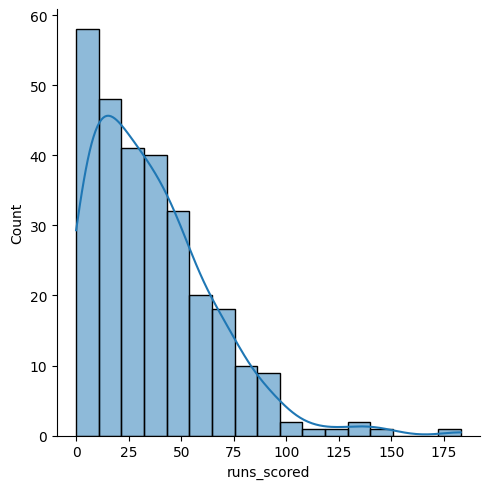

In [17]:
sns.displot(data=df_filtered,x='runs_scored',kde=True)
plt.show()

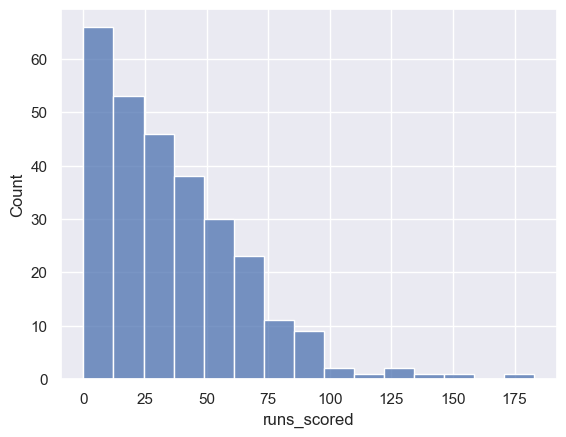

In [18]:
sns.set(style='darkgrid')
sns.histplot(data=df_filtered,x='runs_scored',bins=15)
plt.show()

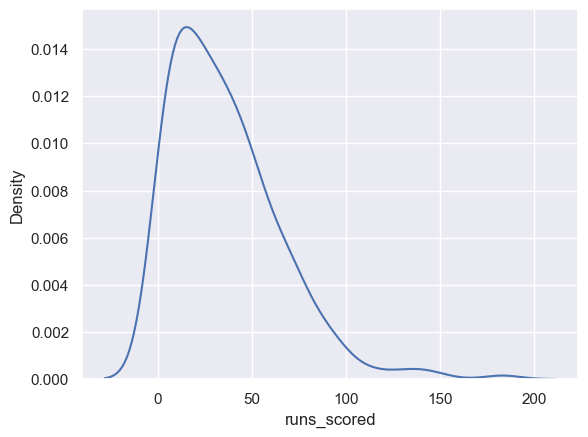

In [19]:
sns.kdeplot(data=df_filtered,x='runs_scored')
plt.show()

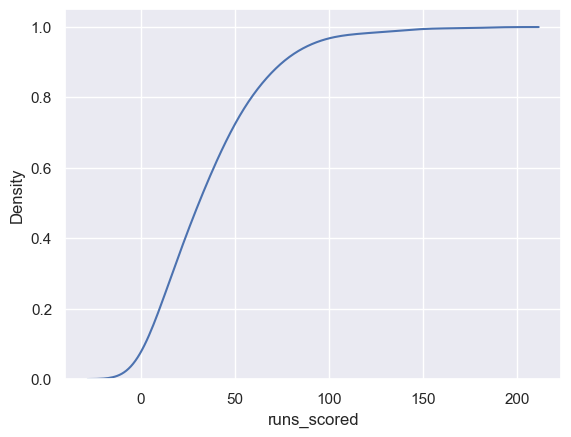

In [20]:
sns.kdeplot(data=df_filtered,x='runs_scored',cumulative=True)
plt.show()

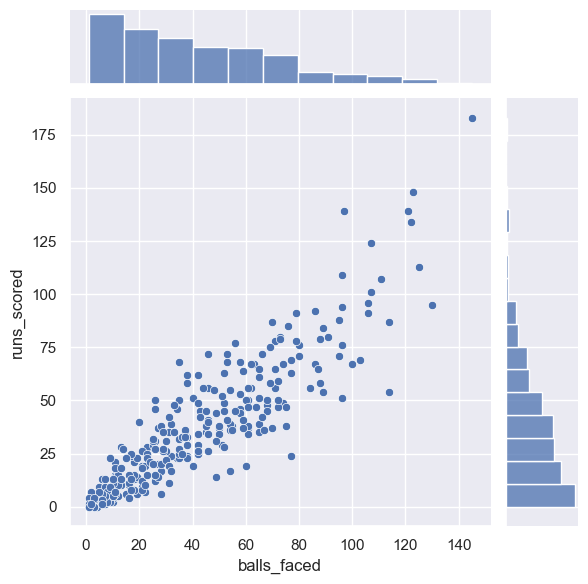

In [21]:
sns.jointplot(x='balls_faced',y='runs_scored',data= df_new,kind='scatter')
plt.show()

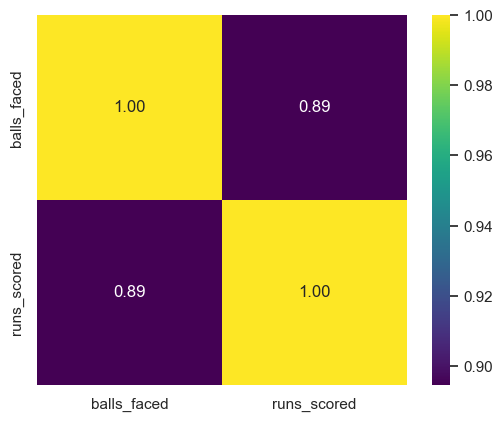

In [22]:
correlation_matrix = df_new[['balls_faced','runs_scored']].corr()
sns.heatmap(data=correlation_matrix,annot=True,cmap='viridis',square=True,fmt='.2f')
plt.show()

              balls_faced  runs_scored  strike_rate
opposition                                         
Australia            2052         1660    80.896686
Bangladesh            682          569    83.431085
England              1758         1546    87.940842
New Zealand          1140          940    82.456140
Pakistan             1361         1231    90.448200
South Africa          950          830    87.368421
Sri Lanka            2645         2383    90.094518
West Indies          1108         1005    90.703971


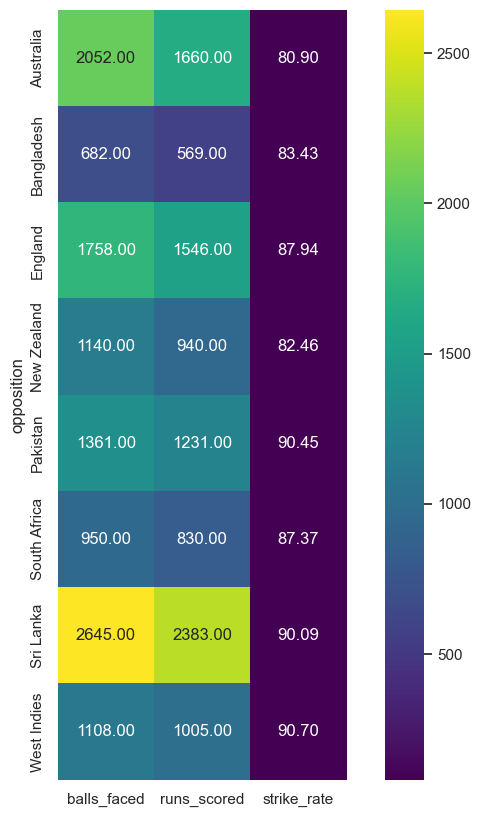

In [23]:
group_by_opposition = df_filtered.groupby('opposition')
agg_sum = group_by_opposition.agg({'balls_faced':'sum','runs_scored':'sum'})
df_strike_rate = agg_sum
df_strike_rate['strike_rate']= 100*df_strike_rate['runs_scored']/df_strike_rate['balls_faced']
print(df_strike_rate)
plt.figure(figsize=(10,10))
sns.heatmap(data=df_strike_rate,annot=True,cmap='viridis',square=True,fmt='.2f')
plt.show()

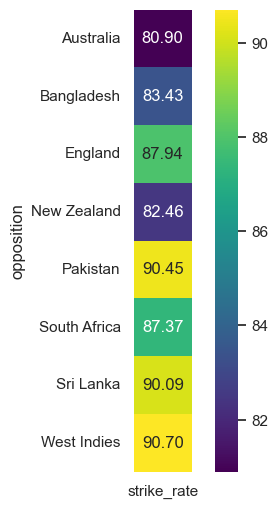

In [24]:
df_strike_rate = df_strike_rate[['strike_rate']]
plt.figure(figsize=(6,6))
sns.heatmap(df_strike_rate,annot=True,cmap='viridis',square=True,fmt='.2f')
plt.show()

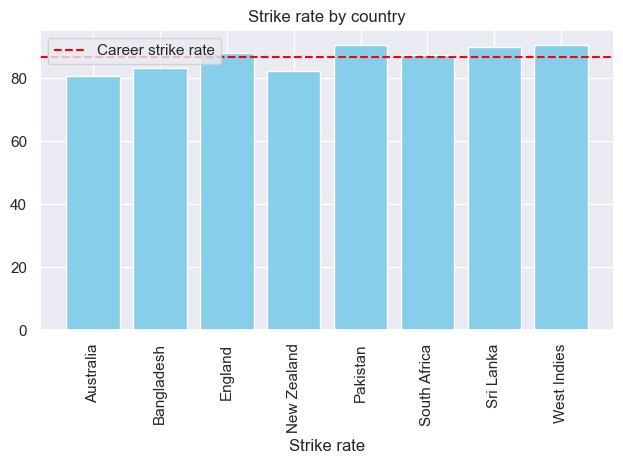

In [25]:
df_strike_rate.reset_index(inplace=True)
plt.bar(df_strike_rate['opposition'],df_strike_rate['strike_rate'],color='skyblue')
plt.xticks(rotation = 90)
aggregate_strike_rate = df_strike_rate['strike_rate'].mean()
plt.axhline(y=aggregate_strike_rate,color='red',linestyle='--',label='Career strike rate')
plt.xlabel('Country')
plt.xlabel('Strike rate')
plt.title('Strike rate by country')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
df_filtered

runs_scored  balls_faced  strike_rate  fours  sixes    opposition  \
21           183          145       126.20     15     10     Sri Lanka   
4            148          123       120.32     15      4      Pakistan   
228          139          121       114.87     12      5     Australia   
284          134          122       109.83     10      6       England   
146          124          107       115.88      9      3     Australia   
..           ...          ...          ...    ...    ...           ...   
74             0            4         0.00      0      0  South Africa   
273            0            3         0.00      0      0     Australia   
171            0            1         0.00      0      0     Australia   
223            0            4         0.00      0      0       England   
0              0            1         0.00      0      0    Bangladesh   

            ground       date  year  not_out  
21          Jaipur 2005-10-31  2005        1  
4    Visakhapatnam 2005-04-05  2005        0  
228         Mohali 2013-10-19  2013        1  
284        Cuttack 2017-01-19  2017        0  
146         Nagpur 2009-10-28  2009        0  
..             ...        ...   ...      ...  
74         Belfast 2007-06-29  2007        0  
273       Canberra 2016-01-20  2016        0  
171  Visakhapatnam 2010-10-20  2010        0  
223     Birmingham 2013-06-23  2013        0  
0       Chattogram 2004-12-23  2004        0  

[284 rows x 10 columns]

In [27]:
df_boundaries=df_filtered[['runs_scored','fours','sixes','opposition']]
df_boundaries['runs_in_boundaries'] =4*df_boundaries['fours']+6*df_boundaries['sixes']
df_boundaries_selected = df_boundaries[['opposition','runs_scored','runs_in_boundaries']]
df_grouped_by_opposition = df_boundaries_selected.groupby('opposition')
df_grouped_by_opposition = df_grouped_by_opposition.sum().reset_index()
df_grouped_by_opposition

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_24204\505677835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boundaries['runs_in_boundaries'] =4*df_boundaries['fours']+6*df_boundaries['sixes']


opposition  runs_scored  runs_in_boundaries
0     Australia         1660                 646
1    Bangladesh          569                 214
2       England         1546                 720
3   New Zealand          940                 412
4      Pakistan         1231                 582
5  South Africa          830                 376
6     Sri Lanka         2383                 998
7   West Indies         1005                 420

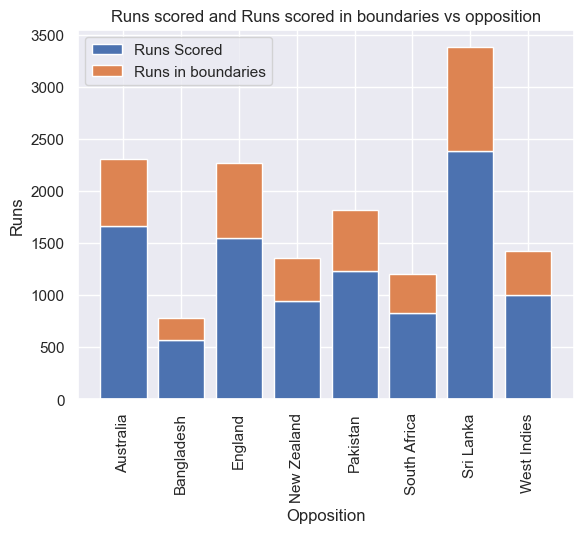

In [28]:
plt.bar(df_grouped_by_opposition['opposition'],df_grouped_by_opposition['runs_scored'],label='Runs Scored')
plt.bar(df_grouped_by_opposition['opposition'],df_grouped_by_opposition['runs_in_boundaries'],bottom = df_grouped_by_opposition['runs_scored'],label='Runs in boundaries')
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title('Runs scored and Runs scored in boundaries vs opposition')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

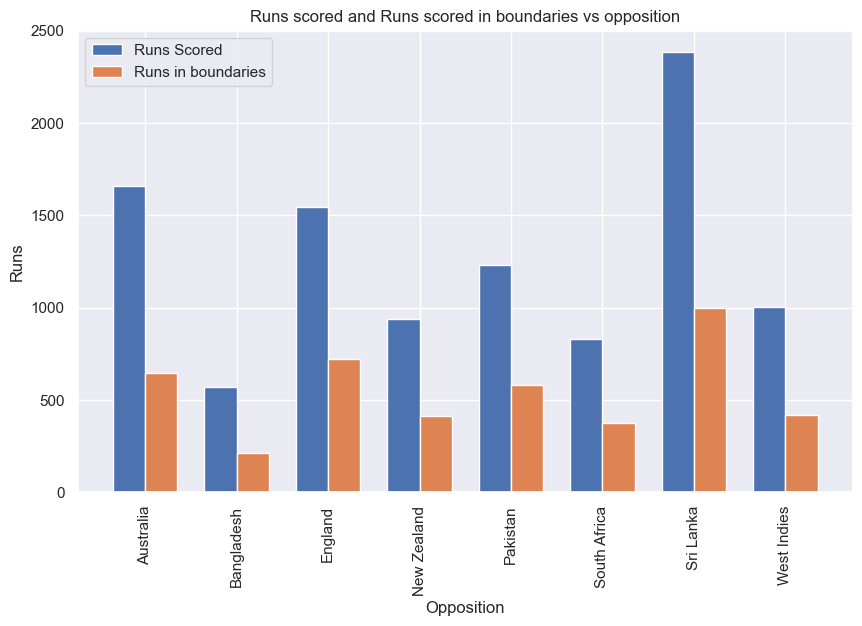

In [29]:
plt.figure(figsize=(10,6))
bar_width = 0.35

index = np.arange(len(df_grouped_by_opposition['opposition']))

plt.bar(index,df_grouped_by_opposition['runs_scored'],label='Runs Scored',width = bar_width)
plt.bar(index+bar_width,df_grouped_by_opposition['runs_in_boundaries'],label='Runs in boundaries',width = bar_width)
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title('Runs scored and Runs scored in boundaries vs opposition')
plt.legend()
plt.xticks(index+bar_width/2,df_grouped_by_opposition['opposition'],rotation = 90)
plt.show()

     runs_scored  balls_faced  fours  sixes    opposition
21           183          145     15     10     Sri Lanka
4            148          123     15      4      Pakistan
228          139          121     12      5     Australia
284          134          122     10      6       England
146          124          107      9      3     Australia
..           ...          ...    ...    ...           ...
74             0            4      0      0  South Africa
273            0            3      0      0     Australia
171            0            1      0      0     Australia
223            0            4      0      0       England
0              0            1      0      0    Bangladesh

[284 rows x 5 columns]


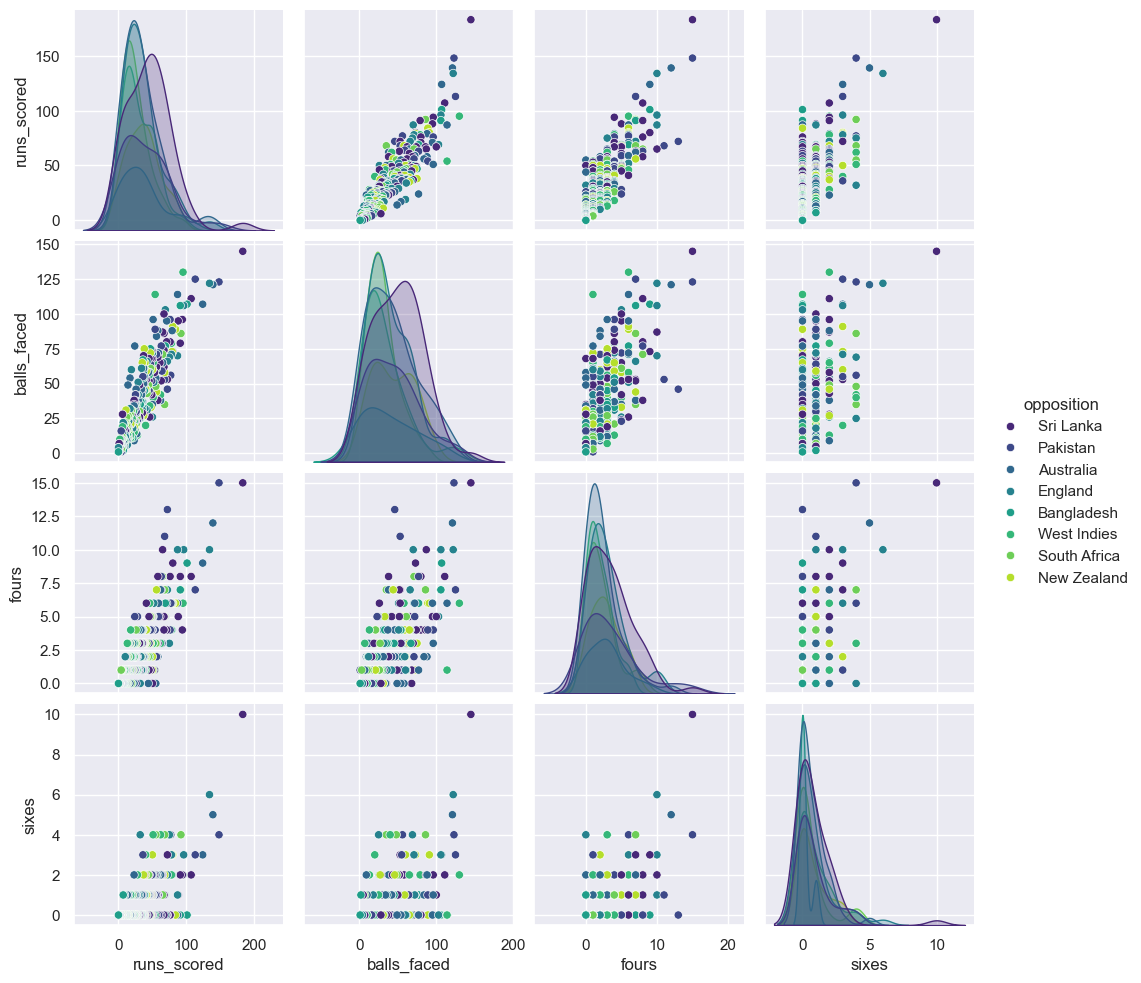

In [30]:
df_pair_plot = df_filtered[['runs_scored','balls_faced','fours','sixes','opposition']]
print(df_pair_plot)
sns.pairplot(df_pair_plot,hue ='opposition',palette='viridis')
plt.show()

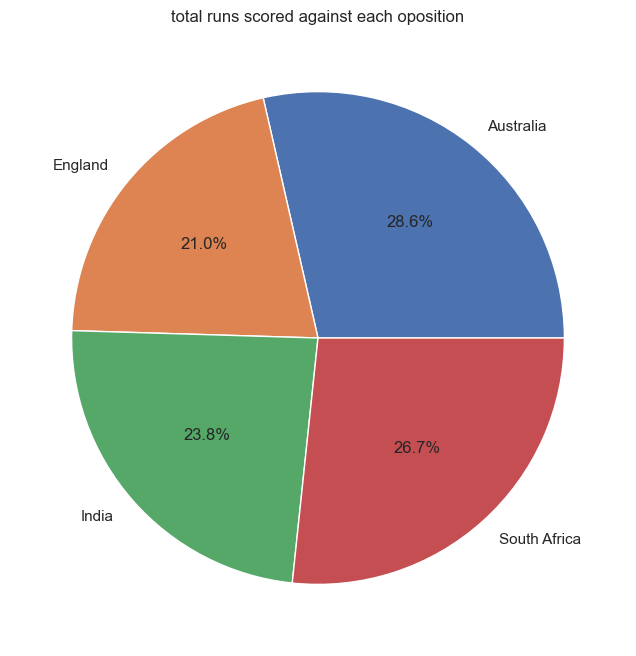

In [41]:
df_filtered = pd.DataFrame({'opposition':['India','Australia','England','South Africa'],'runs scored':[250,300,220,280]})

df_grouped = df_filtered.groupby('opposition')['runs scored'].sum()

plt.figure(figsize=(8,8))
plt.pie(df_grouped,labels=df_grouped.index,autopct='%1.1f%%')
plt.title('total runs scored against each oposition')
plt.show()

In [36]:
df_grouped

opposition
Australia       300
England         220
India           250
South Africa    280
Name: runs scored, dtype: int64